In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.random.set_seed(42)
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/Data/Mean11.csv'
SensorData = pd.read_csv(filename)

In [2]:
SensorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230386 entries, 0 to 230385
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sx00    230386 non-null  float64
 1   Sx01    230386 non-null  float64
 2   Sx02    230386 non-null  float64
 3   Sx03    230386 non-null  float64
 4   Sx04    230386 non-null  float64
 5   Sx05    230386 non-null  float64
 6   Sx06    230386 non-null  float64
 7   Sx07    230386 non-null  float64
 8   Sx08    230386 non-null  float64
 9   Sx09    230386 non-null  float64
 10  r       230386 non-null  float64
 11  theta   230386 non-null  int64  
 12  z       230386 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 22.9 MB


In [3]:
SensorData.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,r,theta,z
count,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000,230386.000000
mean,28.436355,30.934132,30.023153,30.818566,26.004271,30.935460,30.018413,32.352403,29.752323,31.563980,0.900028,175.003559,18.000451
std,1.386960,1.901367,2.051863,2.184356,2.692649,1.859593,1.755364,2.350213,1.434937,1.579576,0.574453,103.879987,11.489041
min,20.090000,18.730000,12.820000,13.820000,13.730000,18.360000,14.820000,16.090000,21.000000,19.820000,0.000000,0.000000,0.000000
25%,27.640000,30.090000,29.820000,30.270000,24.270000,30.000000,29.360000,31.180000,29.000000,30.640000,0.400000,90.000000,8.000000
50%,28.450000,31.180000,30.360000,31.180000,25.820000,31.090000,30.270000,32.640000,29.910000,31.640000,1.000000,180.000000,20.000000
75%,29.360000,32.090000,30.910000,32.000000,27.910000,32.000000,31.090000,33.910000,30.640000,32.640000,1.400000,267.500000,28.000000
max,33.450000,36.270000,34.000000,36.270000,34.820000,36.450000,34.820000,39.360000,34.640000,37.270000,1.800000,350.000000,36.000000


In [4]:
SensorData.sample(5)

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,r,theta,z
155668,27.64,33.45,25.00,31.45,23.00,31.18,31.82,32.36,30.00,33.45,0.4,270,24
127542,28.91,30.73,30.55,30.82,21.91,31.55,30.36,32.00,30.27,32.64,0.6,190,20
56988,29.09,31.45,29.45,31.27,23.18,31.73,31.73,33.55,27.18,31.82,0.0,170,8
53465,27.55,30.73,29.45,31.00,22.91,32.73,27.82,34.00,29.09,33.27,1.0,110,8
1894,30.00,29.82,30.91,31.27,24.91,26.73,28.73,33.36,31.64,31.00,1.8,20,0


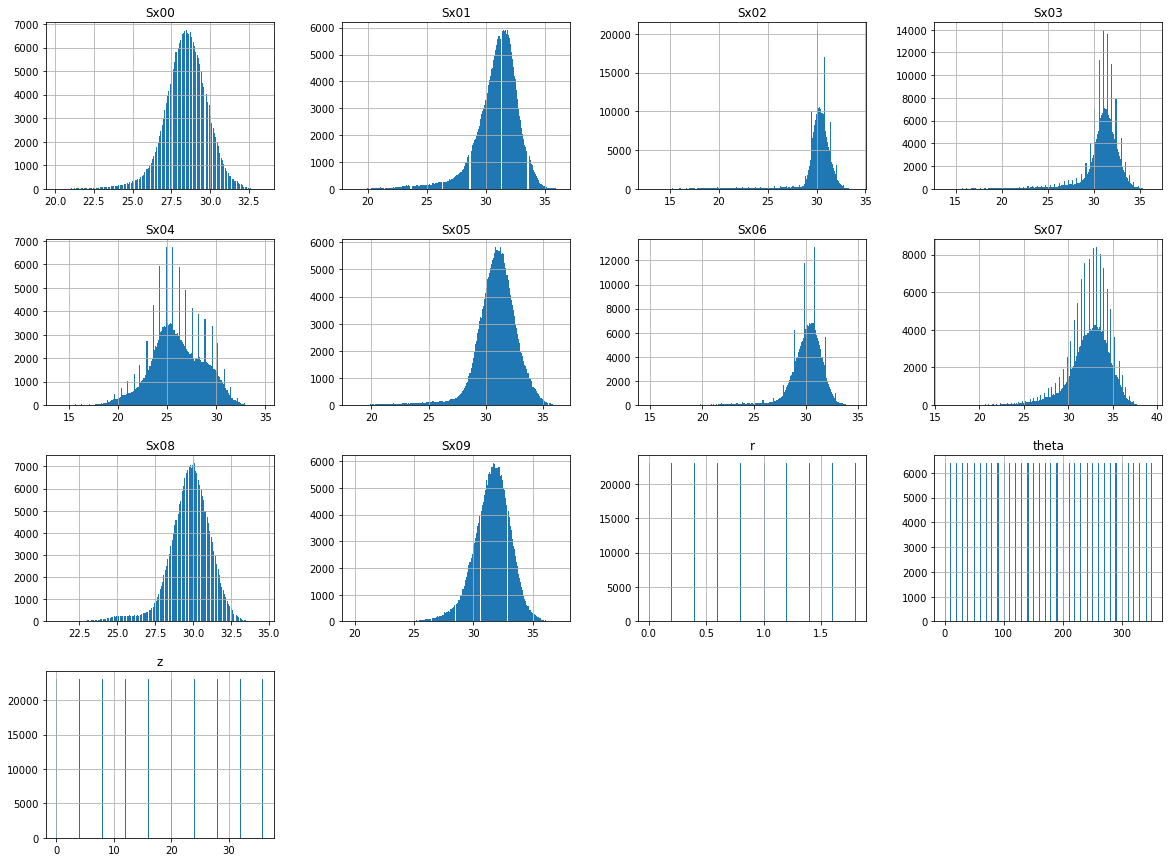

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
SensorData.hist(bins=200, figsize=(20,15))
plt.show()

In [7]:
X = SensorData.iloc[:,:10]
y = SensorData.iloc[:,11]

In [8]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09
0,20.09,18.73,19.27,28.27,18.45,20.36,14.82,24.27,21.18,24.09
1,22.00,21.91,22.09,28.91,20.00,22.91,18.91,25.91,23.36,25.91
2,24.18,25.18,25.00,29.64,21.91,25.64,22.82,27.55,25.73,28.18
3,26.36,28.09,27.82,30.27,23.91,28.18,26.64,29.27,28.09,30.18
4,28.45,30.91,30.73,30.91,25.82,30.82,30.45,31.18,30.36,32.09
...,...,...,...,...,...,...,...,...,...,...
230381,22.91,34.91,29.73,28.82,30.73,30.91,29.91,32.18,28.36,28.27
230382,23.18,34.91,29.73,29.45,30.73,30.64,30.00,31.91,28.82,28.00
230383,23.36,34.64,29.91,29.55,31.27,30.45,30.09,32.18,29.18,27.64
230384,23.36,34.64,29.73,29.82,30.91,30.27,30.36,32.00,29.18,27.73


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [13]:
pca.explained_variance_ratio_

array([0.20291403, 0.16651578])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42,stratify=y_train_full)

In [21]:
import numpy as np
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99)+1

In [22]:
d

10